In [7]:
import numpy as np
from tree_spex import lgboost_fit, lgboost_to_fourier, lgboost_tree_to_fourier, ExactSolver

num_masks = 100
num_features = 57
max_solution_order = 57

all_masks = np.random.choice(2, size=(num_masks, num_features))
outputs = np.zeros(num_masks)

mask_model = lambda mask : np.sum(mask)

for j, mask in enumerate(all_masks):
    outputs[j] = mask_model(mask)

print('Fitting XGBoost Models')
best_model, cv_r2 = lgboost_fit(all_masks, outputs)
print(f'CV r2: {cv_r2}')

fourier_dict = lgboost_to_fourier(best_model)
print(f'Num Fourier Coefficients: {len(fourier_dict)}')

fourier_dict_trunc = dict(sorted(fourier_dict.items(), key=lambda item: abs(item[1]), reverse=True)[:2000])
# Solve for the best mask up to max_solution_order
best_mask = ExactSolver(fourier_dict_trunc, maximize=True, max_solution_order=max_solution_order).solve()

Fitting XGBoost Models


/home/shai/.conda/envs/mf2/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/shai/.conda/envs/mf2/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/shai/.conda/envs/mf2/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/shai/.conda/envs/mf2/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/home/shai/.conda/envs/mf2/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with featur

CV r2: 0.18992775579647034
Num Fourier Coefficients: 134
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2403918
Academic license 2403918 - for non-commercial use only - registered to la___@berkeley.edu
Number of locations: 133
Constraint 1: 180
Constraint 2: 90
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (linux64 - "Ubuntu 22.04.4 LTS")

CPU model: AMD EPYC 7773X 64-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 128 physical cores, 128 logical processors, using up to 32 threads

Academic license 2403918 - for non-commercial use only - registered to la___@berkeley.edu
Optimize a model with 271 rows, 133 columns and 673 nonzeros
Model fingerprint: 0xa01704f5
Variable types: 0 continuous, 133 integer (133 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e-17, 2e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Found heuristic solution: objective 6.7115171
Found heuristic so

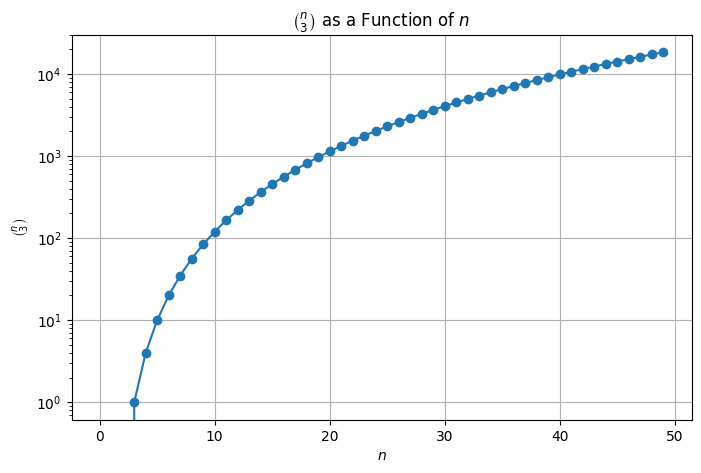

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Define the function for "n choose 3"
def n_choose_3(n):
    if n < 3:
        return 0
    return math.comb(n, 3)

# Generate a range of n values
n_values = np.arange(0, 50)
choose_3_values = [n_choose_3(n) for n in n_values]

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(n_values, choose_3_values, marker='o')
plt.title(r'$\binom{n}{3}$ as a Function of $n$')
plt.xlabel('$n$')
plt.ylabel(r'$\binom{n}{3}$')
plt.grid(True)
plt.yscale('log')
plt.show()
